# 1. Introduction

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama         : Athalla Rafly Mahardhika Noegroho

Dataset : https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset

Objective    : Mampu memahami, dan mengimplementasikan konsep Computer Vision, Melakukan persiapan pada data untuk digunakan dalam pembuatan model Computer Vision dan dapat melakukan analisis dan menjelaskan performa dari model yang sudah dibuat

# 2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os, glob
from PIL import Image
from statistics import median, mean
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1_l2
import random
from tensorflow.keras.applications import MobileNetV2, DenseNet201

from matplotlib.image import imread

import warnings


# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.



In [2]:
import os

shoes_path = {
    'Adidas': 'train/adidas',
    'Nike': 'train/nike',
}

base_path = 'nikeadidas'

for species, path in shoes_path.items():
    full_path = os.path.join(base_path, path)
    class_count = len(os.listdir(full_path))
    print(f'There are {class_count} images of the {species} shoes in the data')


There are 230 images of the Adidas shoes in the data
There are 230 images of the Nike shoes in the data


In [3]:
import os

shoes_path = {
    'Adidas': 'test/adidas',
    'Nike': 'test/nike',
}

base_path = 'nikeadidas'

for species, path in shoes_path.items():
    full_path = os.path.join(base_path, path)
    class_count = len(os.listdir(full_path))
    print(f'There are {class_count} images of the {species} shoes in the data')


There are 30 images of the Adidas shoes in the data
There are 30 images of the Nike shoes in the data


In [4]:
import os

shoes_path = {
    'Adidas': 'validation/adidas',
    'Nike': 'validation/nike',
}

base_path = 'nikeadidas'

for species, path in shoes_path.items():
    full_path = os.path.join(base_path, path)
    class_count = len(os.listdir(full_path))
    print(f'There are {class_count} images of the {species} shoes in the data')


There are 27 images of the Adidas shoes in the data
There are 28 images of the Nike shoes in the data


# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [5]:
IMG_SIZE = 400
path = 'nikeadidas/train/'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='binary', shuffle=True) #class_mode = categorical for multiclass

Found 460 images belonging to 2 classes.


In [6]:
data.next()

(array([[[[245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.],
          ...,
          [245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.]],
 
         [[245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.],
          ...,
          [245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.]],
 
         [[245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.],
          ...,
          [245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.]],
 
         ...,
 
         [[245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.],
          ...,
          [245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.]],
 
         [[245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.],
          ...,
          [245., 245., 245.],
          [245., 245., 245.],
          [245., 245., 245.

c:\Users\athal\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


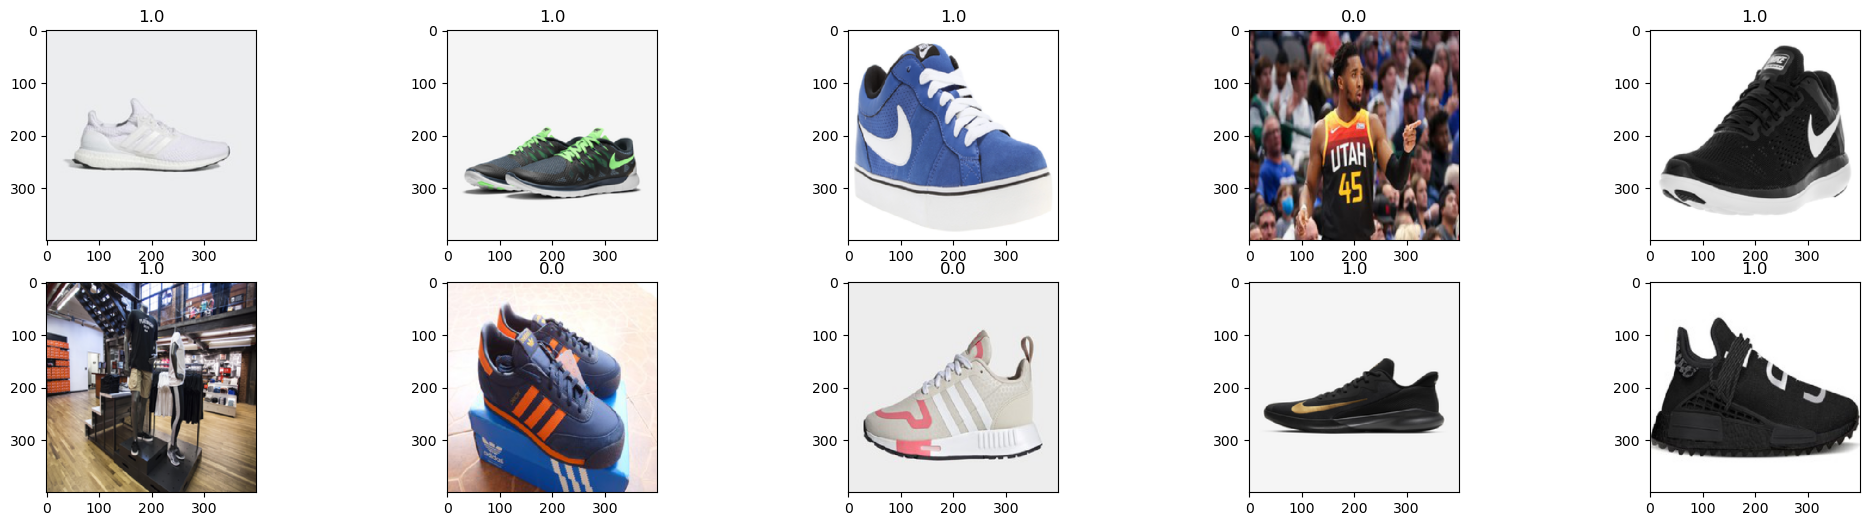

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 6))
n = 0

try:
    while True:
        for i in range(2):
            for j in range(5):
                
                    img = data.next()[0][n].astype('uint32')
                    ax[i][j].imshow(img)
                    ax[i][j].set_title(data.next()[1][n])
                    n += 1
except StopIteration:
    pass
except IndexError:
     pass

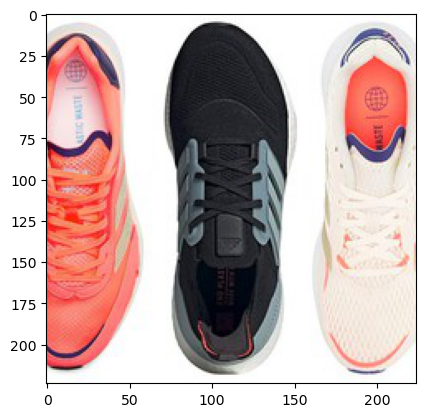

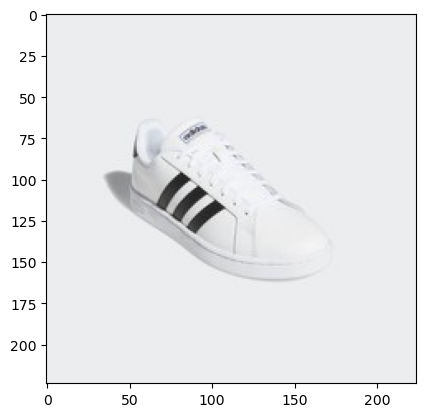

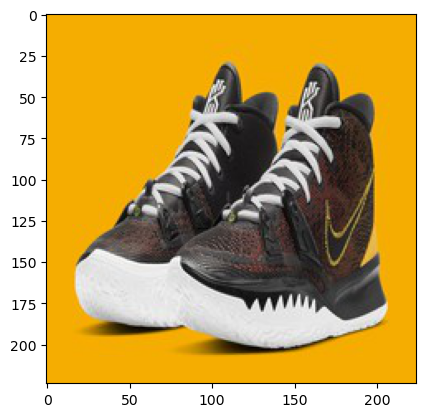

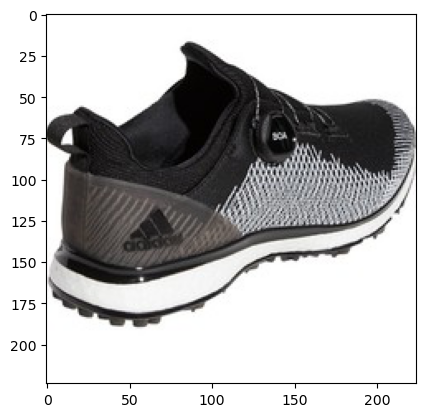

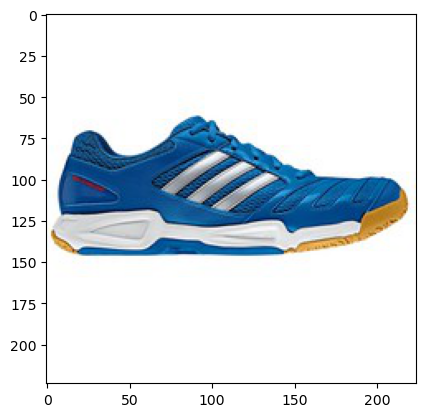

In [8]:
folder_path = "nikeadidas/train/adidas"
image_files = os.listdir(folder_path)

# Shuffle the list of image files
random.shuffle(image_files)

for _ in range(5):
    i = np.random.randint(0, len(image_files))
    file_path = os.path.join(folder_path, image_files[i])

    img = imread(file_path)
    plt.imshow(img)
    plt.show()


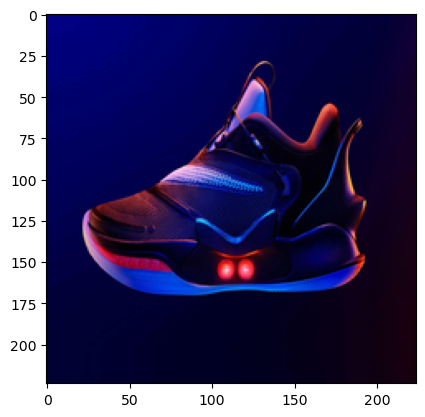

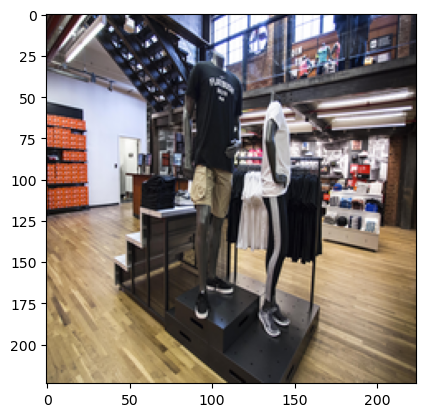

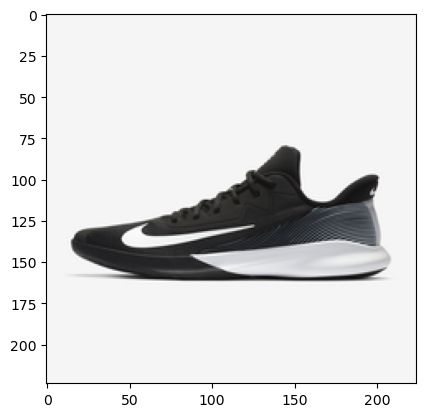

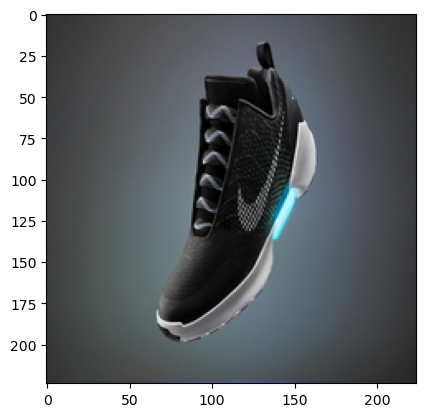

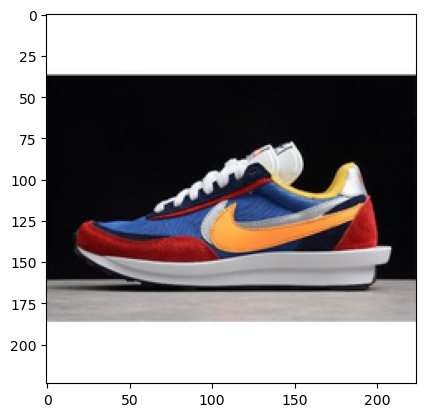

In [9]:
folder_path2 = "nikeadidas/train/nike"
image_files = os.listdir(folder_path2)

# Shuffle the list of image files
random.shuffle(image_files)

for _ in range(5):
    i = np.random.randint(0, len(image_files))
    file_path = os.path.join(folder_path2, image_files[i])

    img = imread(file_path)
    plt.imshow(img)
    plt.show()


distribusi pixel, melihat dimensi fotonya

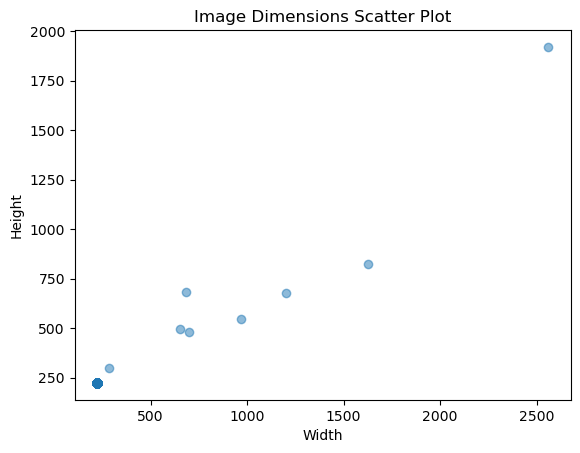

In [10]:
folder_path = "nikeadidas/train/adidas"
image_files = os.listdir(folder_path)

# Lists to store image dimensions
widths = []
heights = []

for file_name in image_files:
    file_path = os.path.join(folder_path, file_name)

    # Open the image using PIL
    img = Image.open(file_path)

    # Get the dimensions of the image
    width, height = img.size

    # Append dimensions to the lists
    widths.append(width)
    heights.append(height)

# Create a scatter plot
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Dimensions Scatter Plot')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()


Width dan Height paling banyak ada di angka 250 pada sepatu adidas dan width, height tertinggi ada di angka > 2000

### Melihat distribusi Height, Width, Channel pada Image

In [34]:
heights = []
widths = []
channels = []

def image_dimension(shoes_path):
    """
    Grabs all the values of the height, width and colour channels of each image according to the
    species and stores them in the dictionary above.
    """
    for shoes, folder in shoes_path.items():
        image_list = os.listdir(f'nikeadidas/{folder}')
        for im in image_list:
            image_path = f'nikeadidas/{folder}'
            image = Image.open(f'{image_path}/{im}')
            width, height = image.size # Width and Height of image
            channel = image.getbands() # Colour channels of image
            heights.append(height)
            widths.append(width)
            channels.append(channel)

image_dimension(shoes_path)
channels = set(channels)

##### Height Distribution

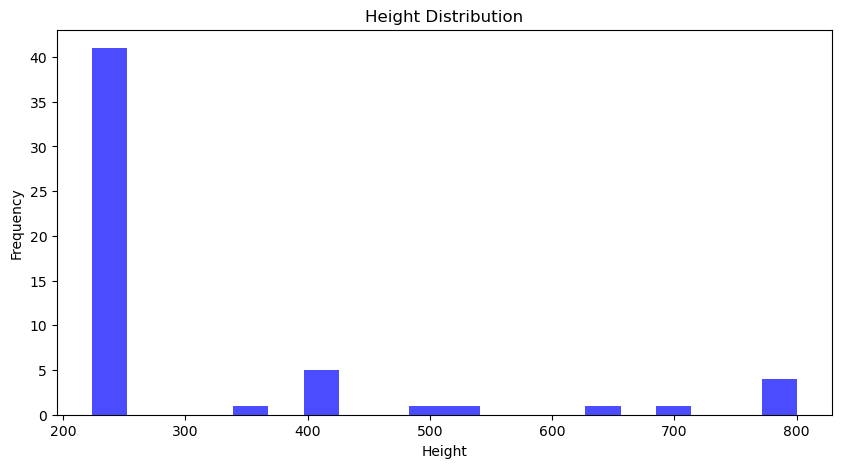

In [36]:
# Plotting height histogram
plt.figure(figsize=(10, 5))
plt.hist(heights, bins=20, color='blue', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

Dari distribusi tersebut dapat dilihat bahwa distribusi paling banyak ada di angka > 200, dapat disimpulkan bahwa rata - rata Tinggi gambar ada di angka 200

##### Width Distribution

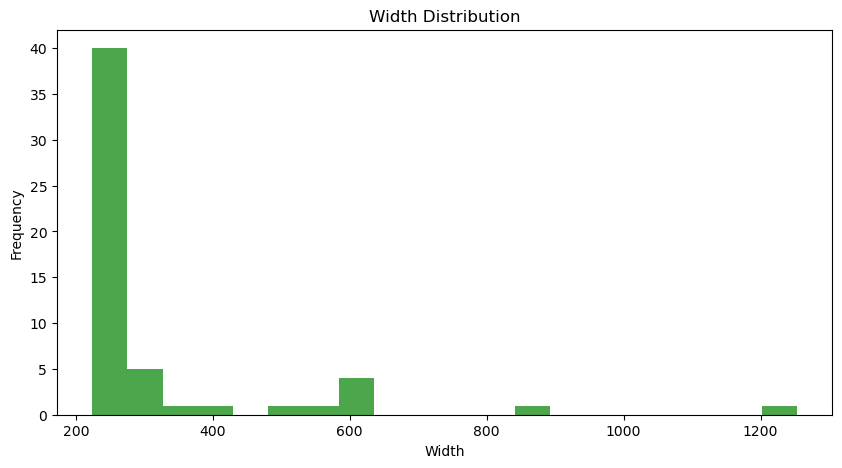

In [37]:
# Plotting width histogram
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=20, color='green', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

Dari distribusi tersebut dapat dilihat bahwa distribusi Width gambar ada di angka > 200 yang berarti rata - rata Width gambar ada di angka 200

##### Channel Distribution

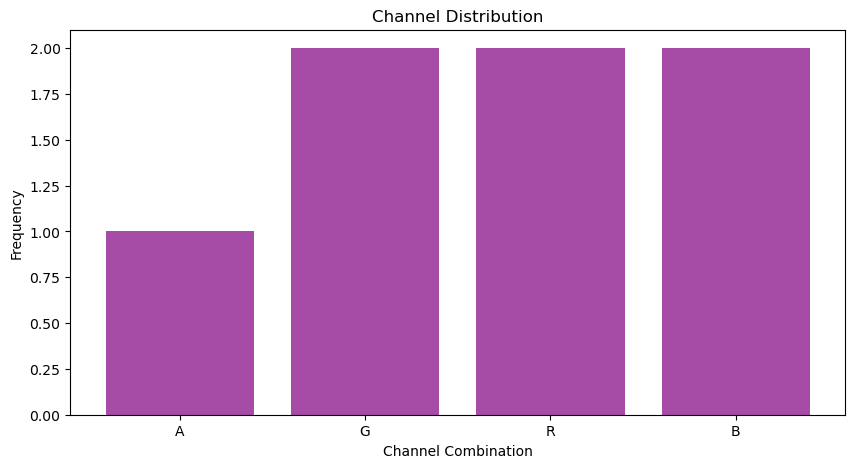

In [40]:
flat_channels = [ch for sublist in channels for ch in sublist]

# Plotting channel bar chart
unique_channels = set(flat_channels)
channel_counts = {ch: flat_channels.count(ch) for ch in unique_channels}

plt.figure(figsize=(10, 5))
plt.bar(range(len(channel_counts)), channel_counts.values(), color='purple', alpha=0.7)
plt.xticks(range(len(channel_counts)), channel_counts.keys())
plt.title('Channel Distribution')
plt.xlabel('Channel Combination')
plt.ylabel('Frequency')
plt.show()

Dari visualisasi tersebut dapat dilihat bahwa rata - rata gambar menggunakan RGB dibanding RGBA karena distribusi A (Alpha) lebih sedikit jika dibanding dengan RGB

# 5. Feature Engineering

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Data Preprocessing

In [13]:
# add Augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,       # Horizontal flipping
    vertical_flip=True,         # Vertical flipping
    rotation_range=90,          # Rotate image counter-clockwise and clockwise up to 90 degrees
    brightness_range=[0.2, 1.0], # Randomly darken or lighten images
    shear_range=0.2,            # Apply shearing transformation
    width_shift_range=0.2,      # Shift images horizontally
    height_shift_range=0.2,     # Shift images vertically
    zoom_range=0.2              # Zoom images
)

test_datagen = ImageDataGenerator(rescale=1./255.)

train_gen = train_datagen.flow_from_directory(
    "nikeadidas/train",
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    "nikeadidas/validation",
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

test_gen = test_datagen.flow_from_directory(
    "nikeadidas/test",
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [14]:
print(train_gen.class_indices)
print(val_gen.class_indices)

{'adidas': 0, 'nike': 1}
{'adidas': 0, 'nike': 1}


In [15]:
np.random.randint(len(train_gen.next()[0]), size=16)

array([19, 22, 24, 20, 26, 11, 17, 24, 17, 10, 17, 26, 17,  5,  6, 26])

# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3))),
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Using optimizer Adam with default learning rate = 0.001
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

#### Using Flatten

In [18]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3))),
model1.add(tf.keras.layers.MaxPooling2D(2, 2))

model1.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model1.add(Dropout(0.3))

model1.add(tf.keras.layers.GlobalAveragePooling2D())
model1.add(tf.keras.layers.Flatten())

# model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(512, activation='relu'))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Using optimizer Adam with default learning rate = 0.001
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

### Using Transfer Learning DenseNet201

In [20]:
# Load MobileNetV2 pre-trained on ImageNet data
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

model2 = Sequential()

model2.add(base_model)
model2.add(GlobalAveragePooling2D())

model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.1))  # You can adjust the dropout rate if needed

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))  # You can adjust the dropout rate if needed

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 4, 4, 1920)        18321984  
                                                                 
 global_average_pooling2d_2  (None, 1920)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_5 (Dropout)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               983552    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                      

# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [21]:
# Checkpointing and early stopping

callbacks1= [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('model_check.h5', save_best_only= True )
]

### Model

In [22]:
# model
history = model.fit(train_gen, epochs= 50, validation_data=val_gen)

Epoch 1/50
15/15 [==============================] - 22s 1s/step - loss: 2.6598 - accuracy: 0.5130 - val_loss: 0.7353 - val_accuracy: 0.4909
Epoch 2/50
15/15 [==============================] - 19s 1s/step - loss: 2.4864 - accuracy: 0.5065 - val_loss: 0.7293 - val_accuracy: 0.4909
Epoch 3/50
15/15 [==============================] - 13s 926ms/step - loss: 2.6285 - accuracy: 0.5304 - val_loss: 0.7338 - val_accuracy: 0.4909
Epoch 4/50
15/15 [==============================] - 13s 875ms/step - loss: 2.6869 - accuracy: 0.5239 - val_loss: 0.7434 - val_accuracy: 0.4909
Epoch 5/50
15/15 [==============================] - 15s 992ms/step - loss: 3.1724 - accuracy: 0.4935 - val_loss: 0.7324 - val_accuracy: 0.4909
Epoch 6/50
15/15 [==============================] - 16s 1s/step - loss: 2.5757 - accuracy: 0.5326 - val_loss: 0.7301 - val_accuracy: 0.4909
Epoch 7/50
15/15 [==============================] - 16s 1s/step - loss: 2.7204 - accuracy: 0.5283 - val_loss: 0.7151 - val_accuracy: 0.4909
Epoch 8/50


Dilihat dari accuracy pada model ini sangat buruk dikarenakan hanya 50% accuracy nya

### Model Flatten

In [23]:
# model Flatten
history1 = model1.fit(train_gen, epochs=50, validation_data = val_gen)

Epoch 1/50
15/15 [==============================] - 13s 760ms/step - loss: 0.6967 - accuracy: 0.5087 - val_loss: 0.6919 - val_accuracy: 0.5091
Epoch 2/50
15/15 [==============================] - 11s 721ms/step - loss: 0.6942 - accuracy: 0.5217 - val_loss: 0.6855 - val_accuracy: 0.5273
Epoch 3/50
15/15 [==============================] - 11s 707ms/step - loss: 0.6854 - accuracy: 0.5652 - val_loss: 0.6721 - val_accuracy: 0.5091
Epoch 4/50
15/15 [==============================] - 11s 721ms/step - loss: 0.6898 - accuracy: 0.5500 - val_loss: 0.6882 - val_accuracy: 0.5636
Epoch 5/50
15/15 [==============================] - 11s 717ms/step - loss: 0.6875 - accuracy: 0.5391 - val_loss: 0.6784 - val_accuracy: 0.5455
Epoch 6/50
15/15 [==============================] - 11s 719ms/step - loss: 0.6865 - accuracy: 0.5413 - val_loss: 0.6820 - val_accuracy: 0.5818
Epoch 7/50
15/15 [==============================] - 11s 739ms/step - loss: 0.6819 - accuracy: 0.5457 - val_loss: 0.6656 - val_accuracy: 0.6364

Hasil dari Model flatten pada accuracy tetap tidak mengalami peningkatan karena tetap di angka 50%, maka perlu dilakukan Improvement

### Model Transfer Learning DenseNet201

In [24]:
# Model Transfer Learning DenseNet201
history3 = model2.fit(train_gen, epochs=50, validation_data=val_gen)

Epoch 1/50
15/15 [==============================] - 44s 2s/step - loss: 0.7054 - accuracy: 0.6304 - val_loss: 0.6575 - val_accuracy: 0.6909
Epoch 2/50
15/15 [==============================] - 30s 2s/step - loss: 0.5260 - accuracy: 0.7196 - val_loss: 0.6170 - val_accuracy: 0.6909
Epoch 3/50
15/15 [==============================] - 30s 2s/step - loss: 0.4392 - accuracy: 0.7935 - val_loss: 0.6156 - val_accuracy: 0.6909
Epoch 4/50
15/15 [==============================] - 30s 2s/step - loss: 0.4515 - accuracy: 0.8000 - val_loss: 0.6730 - val_accuracy: 0.7273
Epoch 5/50
15/15 [==============================] - 30s 2s/step - loss: 0.4560 - accuracy: 0.7891 - val_loss: 0.6966 - val_accuracy: 0.7273
Epoch 6/50
15/15 [==============================] - 30s 2s/step - loss: 0.4167 - accuracy: 0.8261 - val_loss: 0.6830 - val_accuracy: 0.7273
Epoch 7/50
15/15 [==============================] - 31s 2s/step - loss: 0.3917 - accuracy: 0.8130 - val_loss: 0.6172 - val_accuracy: 0.7818
Epoch 8/50
15/15 [==

Hasil dari model Transfer Learning menggunakan DenseNet201 mengalami peningkatan yang signifikan dibangding dari 2 model sebelumnya yang telah dibuat, accuracy pada transfer learning ini ada di angka 80 - 90 %

Dari 3 Model yang dibuat, accuracy yang terbaik ada di model yang menggunakan transfer learning DenseNet201

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### Plot Model

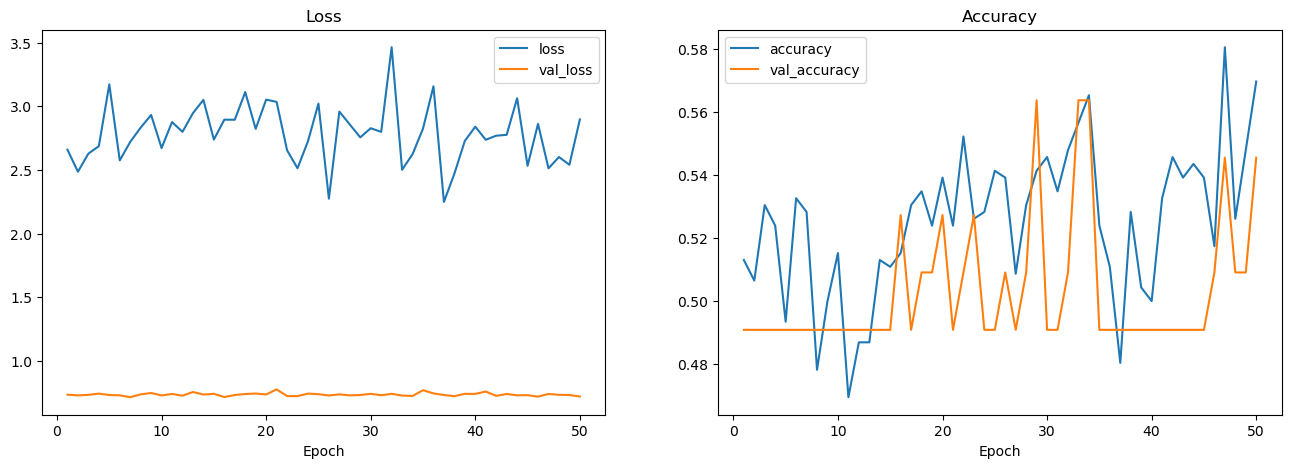

In [25]:
# history plot model
epoch = 50

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1, epoch + 1), history.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()


Dari Plot tersebut dapat dilihat bahwa hasil dari model tersebut masih belum bagus dan perlu dilakukan improvement.

### Plot Flatten

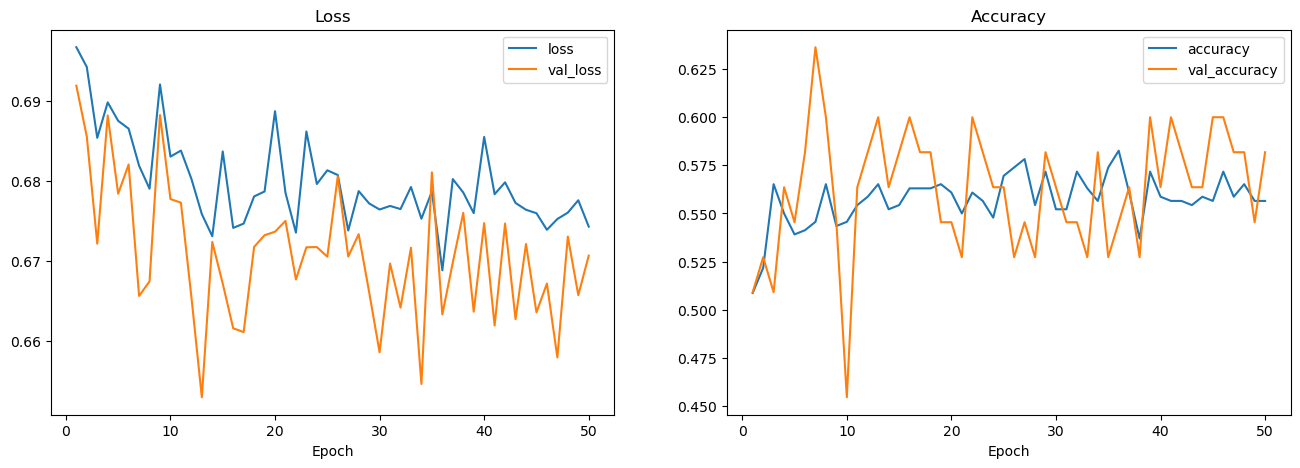

In [26]:
# history plot Flatten
epoch= 50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history1.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history1.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

Model Flatten sudah lebih baik dari model sebelumnya namun belum terlihat bagus juga maka dilakukan improvement lagi menggunakan Transfer Learning

### Plot Transfer Learning

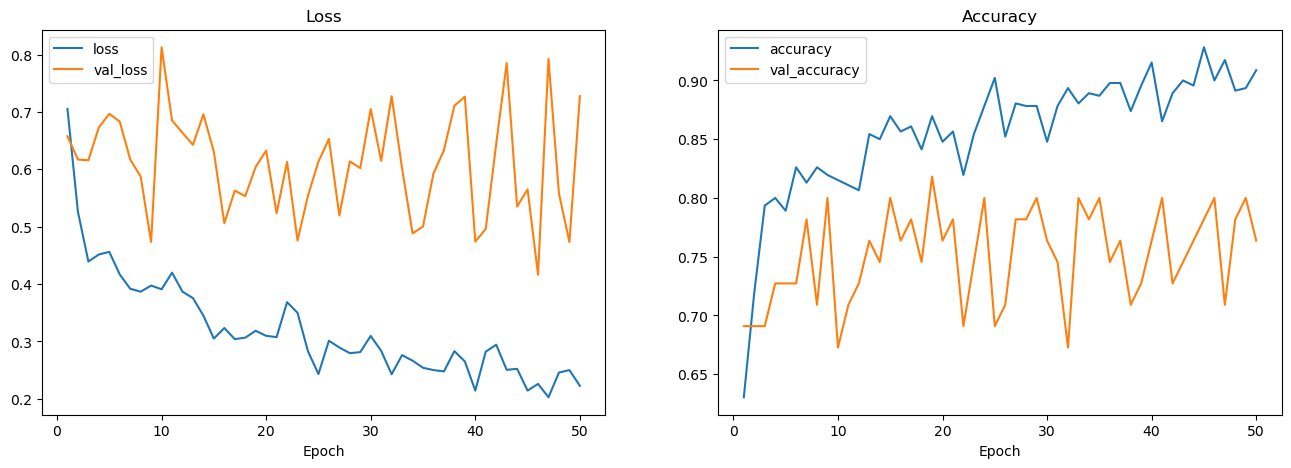

In [27]:
# history plot Transfer Learning
epoch = 50

fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
ax[0].plot(range(1, epoch + 1), history3.history['loss'], label='loss')
ax[0].plot(range(1, epoch + 1), history3.history['val_loss'], label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1, epoch + 1), history3.history['accuracy'], label='accuracy')
ax[1].plot(range(1, epoch + 1), history3.history['val_accuracy'], label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Setelah dilakukan Model Transfer Learning hasil yang didapat masih belum bagus, namun hasil ini lebih baik dari model sebelumnya yang sudah dibuat. Maka model ini yang akan digunakan.

# 9. Model Saving

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [28]:
model.save('model.h5')
model1.save('model_1.h5')
model2.save('model_2.h5')

c:\Users\athal\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 10. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled. Model Inference harus berada pada notebook yang berbeda dari notebook yang dipakai untuk pembuatan model.

##### `Inference dilakukan di file P2G7_athalla_rafly_inference.py`

# 11. Pengambilan Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

- Dari data image nikeadidas, dibuat 3 model yang dilakukan improvement menggunakan Flatten dan Transfer Learning DenseNet201
- Dari ketiga model yang dibuat hasil yang paling maksimal adalah dengan menggunakan Transfer Learning DenseNet201 dengan accuracy 80% - 90%
- Model pertama yang dibuat saat melakukan prediksi tidak selalu tepat
- Model menggunakan Flatten saat melakukan prediksi masih ada salahnya tetapi tidak separah jika dibanding model sebelumnya
- Model menggunakan Transfer Learning DenseNet201 sudah dapat memprediksi sepatu adidas atau nike dengan benar.
- Model Transfer Learning tetap perlu dilakukan improvement lagi seperti melakukan trial error pada Neuoron, Hidden Layer dan lainnya untuk menghasilkan model yang maksimal
- Model akan bekerja lebih maksimal jika data image memiliki latar belakang putih